In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from PIL import Image
import pandas as pd
import numpy as np
# from google.colab.patches import cv2_imshow 

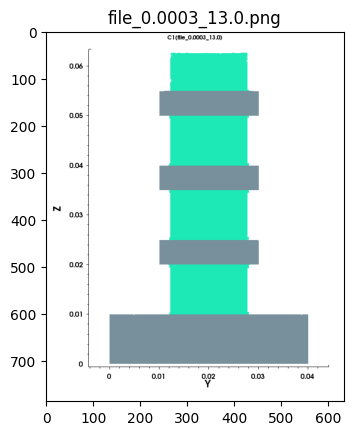

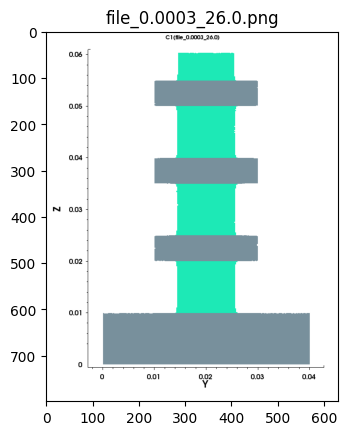

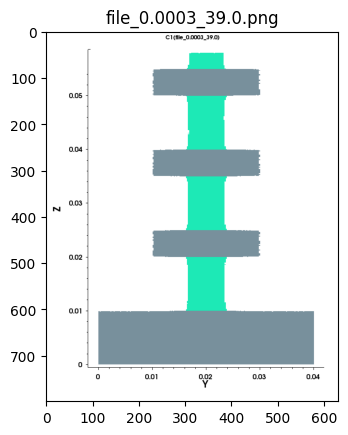

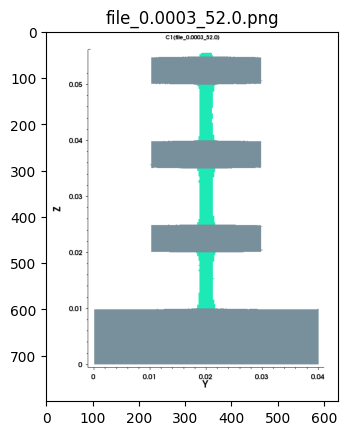

In [2]:
for folder in os.listdir('./images/images'):
    for image in os.listdir(f'./images/images/{folder}'):
        # image_o = cv2.imread(f'./images/images/{folder}/{image}', cv2.IMREAD_ANYCOLOR)
        image_o = mpimg.imread(f'./images/images/{folder}/{image}')

        # window_name = 'image'
  
        plt.title(f'{image}')
        plt.imshow(image_o, label=f'{image}')
        plt.show()

        cv2.waitKey(0) 
        cv2.destroyAllWindows() 
        # image = Image.open(f'./images/images/{folder}/{image}')
        # image.show()
    break


Width: 632, Height: 799, 3
256 256 3


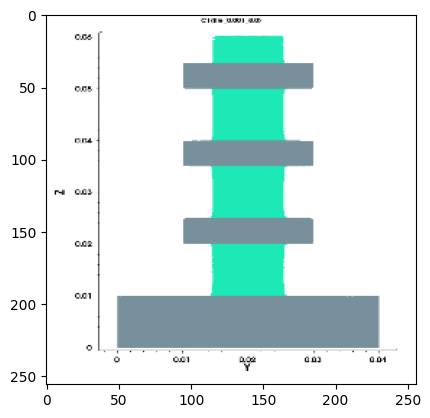

In [3]:
img = mpimg.imread('C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/GAA struct 1/new_interval/images/images/file_0.001/file_0.001_8.0.png')
height, width, channels = img.shape
print(f"Width: {width}, Height: {height}, {channels}")
resized_img = cv2.resize(img, (256,256))
plt.imshow(resized_img, label=f'{image}')
height, width, channels = resized_img.shape
print(height, width, channels)

In [4]:
def get_total():
    total = 0
    for file in sorted(os.listdir(f'./images/images'), key=len):
        total+=len(os.listdir(f'./images/images/{file}')) 
    return total
total  = get_total()

test_size = int(0.2*total)

In [102]:
test_file_num = 0
turn = 1

image_data = []
image_info = pd.DataFrame(columns=['HCl_flux', 'time'])
test_image_data = []
test_image_info = pd.DataFrame(columns=['HCl_flux', 'time'])
for folder in os.listdir('./images/images'):
    for image in os.listdir(f'./images/images/{folder}'):
        if turn<=4 or test_file_num>test_size:
            image_o = cv2.imread(f'./images/images/{folder}/{image}')
            # image_o = cv2.cvtColor(image_o, cv2.COLOR_BGR2GRAY) 
            # image_o = mpimg.imread(f'./images/images/{folder}/{image}',1)
            resized_img = cv2.resize(image_o, (256,256))
            resized_cropped_img = resized_img[154:198,104:-80]
            image_data.append(resized_cropped_img)
            spilt_name = image.split('_')
            HCl_flux = float(spilt_name[1])
            time = int(spilt_name[2].split('.')[0])
            image_info = image_info._append({'HCl_flux': HCl_flux*1000, 'time': time}, ignore_index=True)
            turn+=1
        else:
            test_file_num+=1
            image_o = cv2.imread(f'./images/images/{folder}/{image}')
            # image_o = mpimg.imread(f'./images/images/{folder}/{image}',1)
            resized_img = cv2.resize(image_o, (256,256))
            # resized_img = resized_img/255.0
            resized_cropped_img = resized_img[154:198,104:-80]
            test_image_data.append(resized_cropped_img)
            spilt_name = image.split('_')
            HCl_flux = float(spilt_name[1])
            time = int(spilt_name[2].split('.')[0])
            test_image_info = test_image_info._append({'HCl_flux': HCl_flux*1000, 'time': time}, ignore_index=True)
            if turn<8: turn+=1
            else: turn = 1

In [34]:
# from skimage import io, color
# image = io.imread('images/images/file_0.0003/file_0.0003_13.0.png')

# # Convert the image to grayscale
# grayscale_image = color.rgb2gray(image)
# plt.imshow(grayscale_image)

(-0.5, 71.5, 43.5, -0.5)

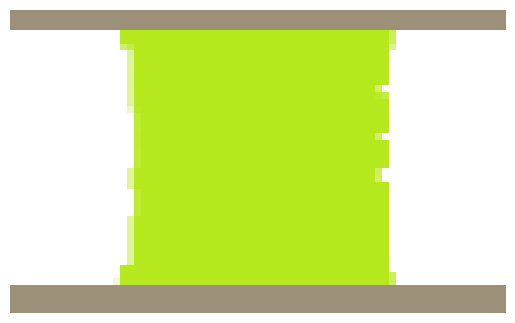

In [76]:
plt.imshow(image_data[12])
plt.axis('off')

In [110]:
image_data = np.array(image_data)
# Normalize image data (if using Grayscale)
image_data = image_data/255.0

test_image_data = np.array(test_image_data)
# Normalize image data (if using Grayscale)
test_image_data = test_image_data/255.0

In [78]:

# # Define input shape
# # (height, width, channels)
# input_shape = (2) 

# model = Sequential()
# model.add(Input(shape=input_shape))

# # TimeDistributed Wrapper to apply Conv layers to each frame
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# # Optional: Adding LSTM for temporal dependencies
# # model.add(LSTM(128, return_sequences=False))

# # Fully Connected Layers
# model.add(Dense(128, activation='relu'))
# model.add(Dense(2, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='mae')

# # Print the model summary
# # model.summary()


# history = model.fit( image_data, image_info, 
#                     validation_data=(test_image_data, test_image_info), 
#                     epochs=100, batch_size=4)

In [111]:
image_data

array([[[[0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824],
         ...,
         [0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824]],

        [[0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824],
         ...,
         [0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824]],

        [[0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824],
         ...,
         [0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824],
         [0.61176471, 0.56470588, 0.47058824]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [150]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, TimeDistributed, LSTM, Input, Reshape
from tensorflow.keras import backend as K


# input_shape = (2,) 
def custom_loss_function(y_true, y_pred):
    error = abs(y_pred - y_true)
    error = error / K.mean(y_true)
    loss = K.mean(error, axis=-1)
    return loss

model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(1024, activation='relu'))  # Adjust units as needed
# model.add(Dense(2048, activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(, activation='relu'))
# model.add(Dense(256*256*3, activation='sigmoid'))  # Output layer for image (256x256)
model.add(Dense(44*72*3, activation='sigmoid'))

# Reshape the output to match the image dimensions
model.add(Reshape((44, 72, 3)))
# Compile the model
model.compile(optimizer='adam', loss='mape')

# Print the model summary
# model.summary()

history = model.fit(image_info,image_data, 
                    validation_data=(test_image_info, test_image_data), 
                    epochs=1000, batch_size=8)

y_pred = model.predict(test_image_info)

Epoch 1/1000


32/32 ━━━━━━━━━━━━━━━━━━━━ 25636s 146ms/step - loss: 49.2098 - val_loss: 28.0005
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 26.7928 - val_loss: 28.5547
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 25.7864 - val_loss: 27.7821
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 24.2214 - val_loss: 27.8235
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 23.5122 - val_loss: 27.1446
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - loss: 23.3383 - val_loss: 27.7066
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 22.8655 - val_loss: 24.3726
Epoch 8/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 22.9743 - val_loss: 24.5450
Epoch 9/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 23.0769 - val_loss: 22.2502
Epoch 10/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 21.8990 - val_loss: 22.9273
Epoch 11/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 20.8569 - val_loss: 20.4312
Epoch 12/1000
32/

KeyboardInterrupt: 

In [176]:
y_pred = model.predict(pd.DataFrame([[0.0003*1000,13]], columns=['HCl_flux', 'time']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [177]:
import math
# y_pred = y_pred.reshape(256,256,3)
y_pred = y_pred.reshape(44,72,3)
# y_pred = np.ceil(y_pred*255)

(-0.5, 71.5, 43.5, -0.5)

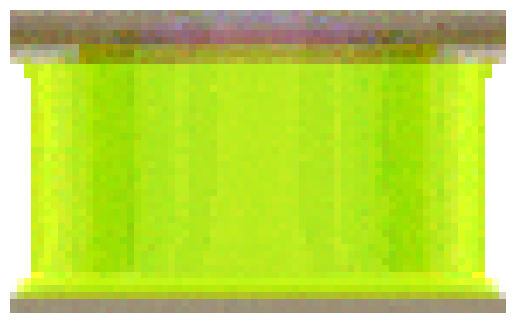

In [178]:
plt.imshow(y_pred)
plt.axis('off')